Newton Method Implementation

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
import random
import os

In [2]:
def func(x1, x2):
    # Define the function
    ####### TODO ########
    inputs = np.array([x1,x2])
    res = 2*(inputs[0]**2) + 2*(inputs[1]**2) - 17*inputs[1]*(np.cos(0.2*np.pi*inputs[0])) - inputs[0]*inputs[1]

    #####################
    return res

In [3]:
def hessian(x1, x2):
    # Calculate the hessian matrix
    # Use theoretically-derived formulas to implement this function
    ####### TODO ########
    inputs = np.array([x1,x2])
    fx1x1 = 4 + 0.68*np.square(np.pi)*inputs[1]*(np.cos(0.2*np.pi*inputs[0]))
    fx2x2 = 4
    fx1x2 = 3.4*np.pi*(np.sin(0.2*np.pi*inputs[0])) - 1
    res = np.array([[fx1x1,fx1x2],[fx1x2,fx2x2]])
    #####################
    return res

In [5]:
# Define function inputs
def hessianInv(x):
    # Calculate the determinant and inverse of the hessian matrix
    ####### TODO ########
    a = x[0,0]
    d = x[1,1]
    b = x[0,1]
    c = x[1,0]
    determinant = a*d - b*c
    inv = (1/determinant)*np.array([[d, -b],[-c, a]])
    #####################
    return inv

In [6]:
def gradient(x1, x2):
    # Calculate the gradient vector
    # Use theoretically-derived formulas to implement this function
    ####### TODO ########
    inputs = np.array([x1,x2])
    fx1 = 4*inputs[0] + 3.4*np.pi*inputs[1]*(np.sin(0.2*np.pi*inputs[0])) - inputs[1]
    fx2 = 4*inputs[1] - 17*(np.cos(0.2*np.pi*inputs[0])) - inputs[0]
    res = np.array([[fx1], [fx2]])
    #####################
    return res

In [7]:
def newtonMethod(x1, x2, epochs):
    inputs = np.array([np.float32(x1),np.float32(x2)])
    for i in range(epochs):
        # Perform one step of the newton method
        # Use previous functions to implement this part
        # Update values of x1 and x2
        ####### TODO ########
        hessian_matrix = hessian(inputs[0], inputs[1])
        inverse_hessian_matrix = hessianInv(hessian_matrix)
        gradient_matrix = gradient(inputs[0], inputs[1])
        inputs[0] = inputs[0] - np.dot(inverse_hessian_matrix[0], gradient_matrix)
        inputs[1] = inputs[1] - np.dot(inverse_hessian_matrix[1], gradient_matrix)
        #####################
    return inputs[0], inputs[1]

In [8]:
x1 = 1
x2 = 3
epochs = 100
x1, x2 = newtonMethod(x1, x2, epochs)
minVal = func(x1, x2)
print(f"x1 is: {x1} and x2 is: {x2} (after {epochs} epochs)")
print(f"The Minimum Value for the function is: {minVal} (after {epochs} epochs)")

x1 is: 0.1308746635913849 and x2 is: 4.268357753753662 (after 100 epochs)
The Minimum Value for the function is: -36.40349771357444 (after 100 epochs)


In [12]:
####### TODO #########
stepSize = 0.5
range_x1 = np.arange(-5,5,stepSize)[1:]
range_x2 = np.arange(0,10,stepSize)[1:]

In [25]:
points = []
# We want to classify the points into three categories:
# Close = -1, Far = 0, Further = 1
categories = []
for x1 in range_x1:
    for x2 in range_x2:
        # Use Newton method and find the distance as stated in the question
        ######## TODO ##########
        x1_new, x2_new= newtonMethod(x1, x2, 100)
        loss_func = func(x1_new , x2_new)
        distance = abs(loss_func - (-36.40))
        ########################
        if distance < 15:
            categories.append(-1)
        elif distance < 150:
            categories.append(0)
        else:
            categories.append(1)
        points.append([x1, x2])

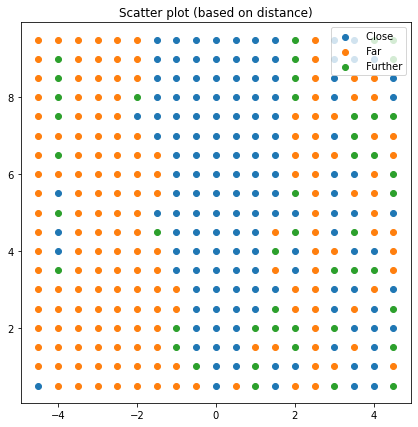

In [26]:
plt.figure(figsize=(7,7))
plt.title('Scatter plot (based on distance)')
########## TODO ###########
# Complete the figure using plt.scatter
category_names = ['Far', 'Further', 'Close']
for cat in np.unique(categories):
    x = np.array(points)[:, 0][categories == cat]
    y = np.array(points)[:, 1][categories == cat]
    plt.scatter(x, y, label=f" {category_names[cat]}")
###########################
plt.legend(loc='upper right' )
plt.show()